# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session.start(
    tt.SessionConfig(user_content_storage="./content", port=55708)
)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    data_types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
BL 1-Click Camera - Free,PHOTOGRAPHY,Photography,2.0.160818,3.5,52.0,1800000.0,10000.0,Free,0.0,Everyone,"August 18, 2016",2.3 and up
K keyboard - Myanmar,TOOLS,Tools,1.0.8,4.8,1955.0,14000000.0,100000.0,Free,0.0,Everyone,"March 17, 2018",4.1 and up
SPARK - Live random video chat & meet new people,SOCIAL,Social,2.1.3.2,4.6,79658.0,17000000.0,5000000.0,Free,0.0,Mature 17,"August 6, 2018",4.3 and up
"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,Social,4.2.4,4.6,22098.0,18000000.0,1000000.0,Free,0.0,Everyone,"July 24, 2018",4.0.3 and up
Quora,SOCIAL,Social,Varies with device,4.5,313633.0,<NA>,10000000.0,Free,0.0,Teen,"July 25, 2018",Varies with device


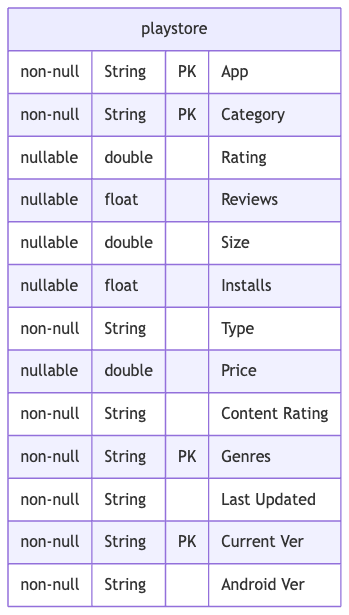

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
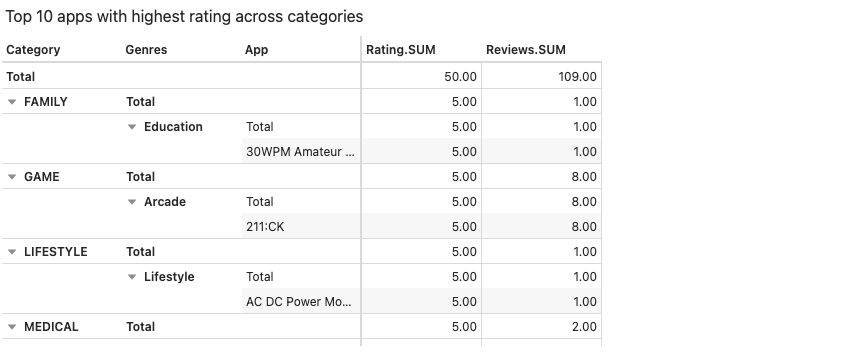

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'Installs.MEAN': <atoti.measure.Measure object at 0x13d13cf50>, 'Installs.SUM': <atoti.measure.Measure object at 0x13d15ec50>, 'Price.MEAN': <atoti.measure.Measure object at 0x13d12cf50>, 'Price.SUM': <atoti.measure.Measure object at 0x13d12dc10>, 'Rating.MEAN': <atoti.measure.Measure object at 0x13d1666d0>, 'Rating.SUM': <atoti.measure.Measure object at 0x13d1664d0>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x13d1653d0>, 'Reviews.SUM': <atoti.measure.Measure object at 0x13d1643d0>, 'Size.MEAN': <atoti.measure.Measure object at 0x13d164ad0>, 'Size.SUM': <atoti.measure.Measure object at 0x13d165c90>, 'contributors.COUNT': <atoti.measure.Measure object at 0x13d164350>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x13d164890>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
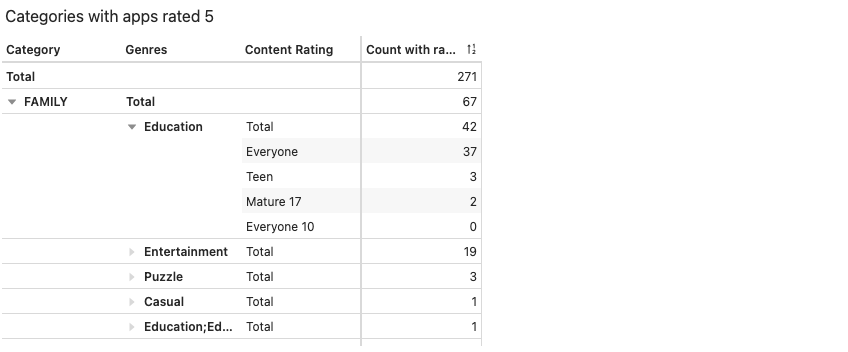

In [7]:
session.widget

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
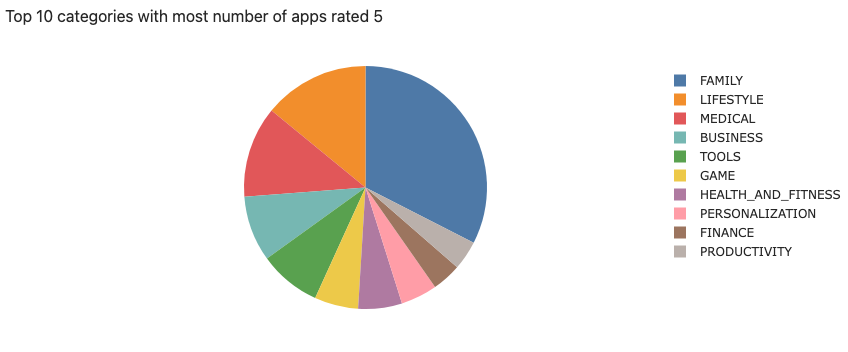

In [8]:
session.widget

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x13caaa7d0>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x13d173350>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x13d1594d0>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x13d19e490>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x13d19fad0>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x13d19c7d0>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x13d19c810>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x13d19cc50>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x13d19ec10>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
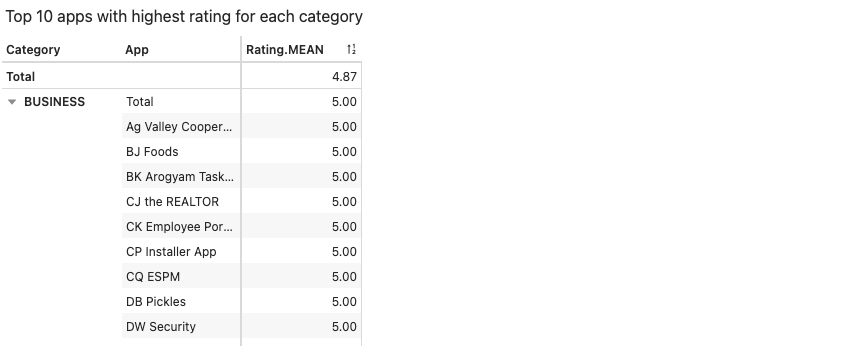

In [10]:
session.widget

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
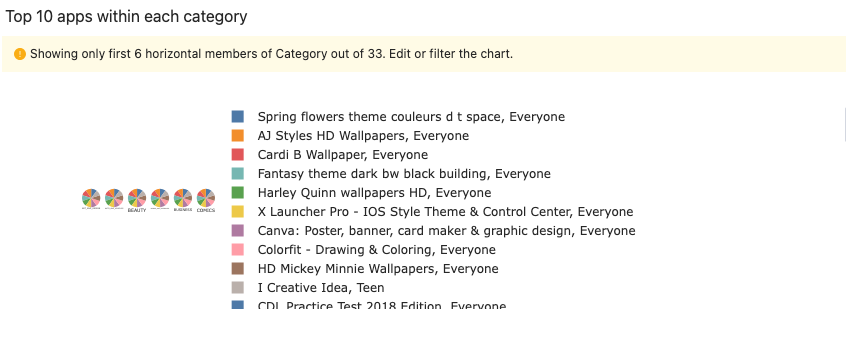

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55708/#/dashboard/767

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>